## **Exploring Malicious URLs: EDA with Logistic Regression & Random Forest**


* EDA with Logistic Regression and Random Forest helps people look closely at suspicious web links
* Using these tools, they can study patterns in data, find important clues, and guess if a link might be harmful.
* This helps them understand what bad links look like and take steps to stop online dangers before they happen.






**BY TEAM MEMBERS:**

**Avadhi Shah (U01887403)**

Urmil Trivedi

Dhyey Dave

1. **Imports Libraries:** This code imports essential libraries like NumPy, Pandas, Matplotlib, Seaborn, and the Google Colab file upload module.

2. **Uploads File:** It prompts users to upload a file from their local machine to the Google Colab environment.

3. **Checks Uploaded Files:** It iterates through the uploaded files, confirming successful uploads by printing their filenames.

4. **Facilitates Data Analysis:** This setup prepares the environment for data analysis by providing the necessary tools and confirming the availability of uploaded data files.

In [2]:
from google.colab import files
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
# Have to upload the file from local machine
uploaded = files.upload()

# Check the uploaded files
for filename in uploaded.keys():
    print(f'File "{filename}" uploaded successfully!')

Saving urldata.csv to urldata.csv
File "urldata.csv" uploaded successfully!


# USING URL DATASET FROM KAGGLE SOURCE: @

In [ ]:
urldata = pd.read_csv("/content/urldata.csv")  #Reads the csv file

In [1]:
urldata.head() # Displays last 5 rows from dataframe

NameError: name 'urldata' is not defined

In [ ]:
urldata = urldata.drop('Unnamed: 0',axis=1) #Drops the column Unnamed

In [ ]:
!pip install tld  #Installing pythong package TLD(Top Level Domain) Providing the functionality to extract tld from url

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 4.7 MB/s eta 0:00:00


In [ ]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

1. **Class Initialization:**
   - The class `URLDataProcessor` is designed to process a given URL and extract various features from it.

2. **Instance Variables:**
   - The constructor (`__init__`) initializes instance variables such as `url`, `url_length`, `hostname_length`, `path_length`, etc., representing different aspects of the input URL.

3. **URL Length Calculation:**
   - The `_calculate_url_length` method calculates and stores the length of the input URL.

4. **Hostname and Path Length Calculation:**
   - `_calculate_hostname_length` computes the length of the hostname in the URL using the `urlparse` function.
   - `_calculate_path_length` calculates the length of the path in the URL.

5. **First Directory Length Calculation:**
   - `_calculate_fd_length` determines the length of the first directory in the URL, handling cases where no directory exists or an IndexError occurs.

6. **Top-Level Domain (TLD) Extraction:**
   - `_get_tld` extracts the top-level domain (TLD) from the URL using the `get_tld` function.

7. **Character and Substring Counting:**
   - Methods such as `_count_character` and `_count_substring` count the occurrences of specific characters or substrings in the URL.

These functions collectively provide a comprehensive set of features describing the structure and content of a given URL. The class is designed to offer insights into URL properties, making it useful for further analysis or classification tasks.

In [ ]:
# Cell 1: Importing Dependencies and Defining the Class

from urllib.parse import urlparse
from tld import get_tld

class URLDataProcessor:
    def __init__(self, url):
        self.url = url
        self.url_length = self._calculate_url_length()
        self.hostname_length = self._calculate_hostname_length()
        self.path_length = self._calculate_path_length()
        self.fd_length = self._calculate_fd_length()
        self.tld = self._get_tld()
        self.tld_length = self._calculate_tld_length()
        self.count_dash = self._count_character('-')
        self.count_at = self._count_character('@')
        self.count_question_mark = self._count_character('?')
        self.count_percent = self._count_character('%')
        self.count_dot = self._count_character('.')
        self.count_equal = self._count_character('=')
        self.count_http = self._count_substring('http')
        self.count_https = self._count_substring('https')
        self.count_www = self._count_substring('www')
        self.count_digits = self._count_digits()
        self.count_letters = self._count_letters()
        self.count_dir = self._count_directory()

    def _calculate_url_length(self):
        #Calculating the length of an URL
        return len(str(self.url))

    def _calculate_hostname_length(self):
        #Calculte the length of hostname in URL
        return len(urlparse(self.url).netloc)

    def _calculate_path_length(self):
        #Calculate the path length of url
        return len(urlparse(self.url).path)

    def _calculate_fd_length(self):
        #Calculating the length of the first directory in the URL, checks if it has first directory, returns 0 if no directory exists and IndexError if there is no second element.
        url_path = urlparse(self.url).path
        try:
            return len(url_path.split('/')[1])
        except IndexError:
            return 0

    def _get_tld(self):
        #Get the top-level domain (TLD) of the URL.
        return get_tld(self.url, fail_silently=True)

    def _calculate_tld_length(self):
        #Calculate the length of the TLD.
        try:
            return len(self.tld)
        except TypeError:
            return -1

    def _count_character(self, char):
        #Count the occurrences of a character in the URL.
        return self.url.count(char)

    def _count_substring(self, substring):
        #Count the occurrences of a substring in the URL.
        return self.url.count(substring)

    def _count_digits(self):
        #Count the number of digits in the URL.
        return sum(1 for i in self.url if i.isnumeric())

    def _count_letters(self):
        #Count the number of letters in the URL.
        return sum(1 for i in self.url if i.isalpha())

    def _count_directory(self):
        #Count the number of directories in the URL.
        url_dir = urlparse(self.url).path
        return url_dir.count('/')


In [ ]:
# Instantiate the class with a sample URL
url_data_instance = URLDataProcessor("https://www.example.com/path/to/page?query=123")

# Printing the calculated attributes
print(url_data_instance.__dict__)

{'url': 'https://www.example.com/path/to/page?query=123', 'url_length': 46, 'hostname_length': 15, 'path_length': 13, 'fd_length': 4, 'tld': 'com', 'tld_length': 3, 'count_dash': 0, 'count_at': 0, 'count_question_mark': 1, 'count_percent': 0, 'count_dot': 2, 'count_equal': 1, 'count_http': 1, 'count_https': 1, 'count_www': 1, 'count_digits': 3, 'count_letters': 33, 'count_dir': 3}


In [ ]:
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [ ]:
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [ ]:
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [ ]:
def get_first_directory_length(url):
    url_path = urlparse(url).path
    try:
        return len(url_path.split('/')[1])
    except IndexError:
        return 0

urldata['first_directory_length'] = urldata['url'].apply(lambda i: get_first_directory_length(i))


In [ ]:
def extract_tld(url):
    return get_tld(url, fail_silently=True)

urldata['extracted_tld'] = urldata['url'].apply(lambda i: extract_tld(i))


In [ ]:
def calculate_tld_length(tld):
    try:
        return len(tld)
    except TypeError:
        return -1
# Assuming 'extracted_tld' column is present in the DataFrame
urldata['tld_length'] = urldata['extracted_tld'].apply(lambda tld: len(str(tld)) if not pd.isnull(tld) else -1)


In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,first_directory_length,extracted_tld,tld_length
0,http://chinacxyy.com/piccodejs-000.asp?lm2=191...,benign,0,81,13,18,17,com,3
1,https://www.youtube.com,benign,0,23,15,0,0,com,3
2,https://www.facebook.com,benign,0,24,16,0,0,com,3
3,https://www.baidu.com,benign,0,21,13,0,0,com,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3


In [ ]:
# Print the list of columns in the DataFrame
print(urldata.columns)


Index(['url', 'label', 'result', 'url_length', 'hostname_length',
       'path_length', 'first_directory_length', 'extracted_tld', 'tld_length'],
      dtype='object')


In [ ]:
from tabulate import tabulate

# Print the first 5 rows of urldata in tabular format
print(tabulate(urldata.head(), headers='keys', tablefmt='pretty'))


+---+-----------------------------------------------------------------------------------+--------+--------+------------+-----------------+-------------+------------------------+---------------+------------+
|   |                                        url                                        | label  | result | url_length | hostname_length | path_length | first_directory_length | extracted_tld | tld_length |
+---+-----------------------------------------------------------------------------------+--------+--------+------------+-----------------+-------------+------------------------+---------------+------------+
| 0 | http://chinacxyy.com/piccodejs-000.asp?lm2=191&x=3&y=2&w=90&h=63&open=1&n=10&tj=0 | benign |   0    |     81     |       13        |     18      |           17           |      com      |     3      |
| 1 |                              https://www.youtube.com                              | benign |   0    |     23     |       15        |      0      |           0        

In [ ]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [ ]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

In [ ]:
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

In [ ]:
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

In [ ]:
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

In [ ]:
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

In [ ]:
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

In [ ]:
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

In [ ]:
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [ ]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,first_directory_length,extracted_tld,tld_length,count-,...,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,http://chinacxyy.com/piccodejs-000.asp?lm2=191...,benign,0,81,13,18,17,com,3,1,...,1,0,2,8,1,0,0,17,41,1
1,https://www.youtube.com,benign,0,23,15,0,0,com,3,0,...,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,com,3,0,...,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,com,3,0,...,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3,0,...,0,0,2,0,1,1,1,0,20,0


In [ ]:
import re #Importing Regex library to identify the patterns in url

1. **IP Address Detection Function:**
   - The `having_ip_address` function determines if a given URL contains an IP address. It utilizes a regular expression to identify both IPv4 and IPv6 patterns within the URL.

2. **Application to DataFrame Column:**
   - The function is applied to the `'url'` column of a DataFrame (`urldata`) using the `apply` method. For each URL in the column, it returns `-1` if an IP address is found and `1` otherwise.

3. **Creation of 'use_of_ip' Column:**
   - The results of the function are stored in a new column named `'use_of_ip'` in the DataFrame (`urldata`). This column serves as a binary indicator, where `-1` implies the presence of an IP address, and `1` indicates the absence of an IP address in the corresponding URL.

In [ ]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

1. **Shortening Service Detection Function:**
   - The `shortening_service` function checks whether a given URL belongs to a known URL shortening service. It uses a regular expression to identify patterns associated with common URL shortening domains such as bit.ly, goo.gl, tinyurl, and others.

2. **Application to DataFrame Column:**
   - The function is applied to the `'url'` column of a DataFrame (`urldata`) using the `apply` method. For each URL in the column, it returns `-1` if the URL is identified as a shortened URL from a known service and `1` otherwise.

3. **Creation of 'short_url' Column:**
   - The results of the function are stored in a new column named `'short_url'` in the DataFrame (`urldata`). This column serves as a binary indicator, where `-1` signifies a URL from a shortening service, and `1` indicates a non-shortened URL.

In [ ]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,first_directory_length,extracted_tld,tld_length,count-,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,http://chinacxyy.com/piccodejs-000.asp?lm2=191...,benign,0,81,13,18,17,com,3,1,...,2,8,1,0,0,17,41,1,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,com,3,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,com,3,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,com,3,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3,0,...,2,0,1,1,1,0,20,0,1,1


# Explanation of the Heatmap with all Features
**This heatmap analyzes the correlation between various features of phishing websites:**

# Features:


1. **URL length:** Number of characters in the URL.

1. **Hostname length:** Number of characters in the hostname.

2.  **First_directory_length:** Number of characters in the first directory of the URL.

1. **TLD length:** Number of characters in the top-level domain (e.g., .com, .net).

1. **count@:** Number of "@" symbols in the URL.

1. **count?:** Number of "?" symbols in the URL.

1. **count%:** Number of "%" symbols in the URL.

1. **count.:** Number of "." symbols in the URL.

1. **count-http:** Number of "http://" occurrences in the URL.
1. **count-https:** Number of "https://" occurrences in the URL.

1. **count-www:** Number of "www." occurrences in the URL.

1. count-digits: Number of digits (0-9) in the URL.

1. **count-letters:** Number of letters (a-z) in the URL.
1. **count dir:** Number of directories in the URL path.

1. **use of ip:** Whether the URL uses an IP address instead of a hostname.

1. **short_url:** Whether the URL is a shortened URL (e.g., using a URL shortening service).

1. **path length:** Total number of characters in the URL path (excluding the hostname).

# Observations:
**URL Length:**
Strong positive correlation with hostname length (0.73):
Phishing websites often use long, complex URLs and hostnames to appear legitimate.

**Moderate positive correlation with first_directory_length (0.54):**
Longer first directories might indicate hidden malicious code.

**First_Directory_Length:**
Moderate positive correlation with TLD length (0.42): Some phishing attempts involve mimicking legitimate domains with similar TLDs.

**Use of IP:**
**Strong negative correlation with count-www (-0.75):** Phishing sites often avoid "www" to appear more credible.

**Moderate positive correlation with path length (0.64):** Complex paths might mask malicious content.

**Moderate negative correlation with count-https (-0.59):** Phishing sites often avoid "https" to avoid detection.

**count@:**
Moderate positive correlation with count? (0.52) and count% (0.48): Phishing URLs often contain excessive special characters.

**count-http:**
Moderate positive correlation with count-https (0.51): URLs might contain both protocols inconsistently.

**count dir:**
Moderate positive correlation with path length (0.62): More directories might indicate deeper URL structure, potentially hiding malicious content.

# Overall:

This heatmap provides valuable insights into how various features of phishing websites are related. By understanding these correlations, we can develop better tools and techniques for identifying and preventing phishing attacks.

# Additional notes:

The heatmap represents correlations, not causations. While some features might co-occur more often in phishing attempts, they don't necessarily cause each other.

The heatmap is based on a specific dataset and might not perfectly reflect all phishing websites.


<ipython-input-36-6d9fb3f1313e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = urldata.corr()


<Axes: >

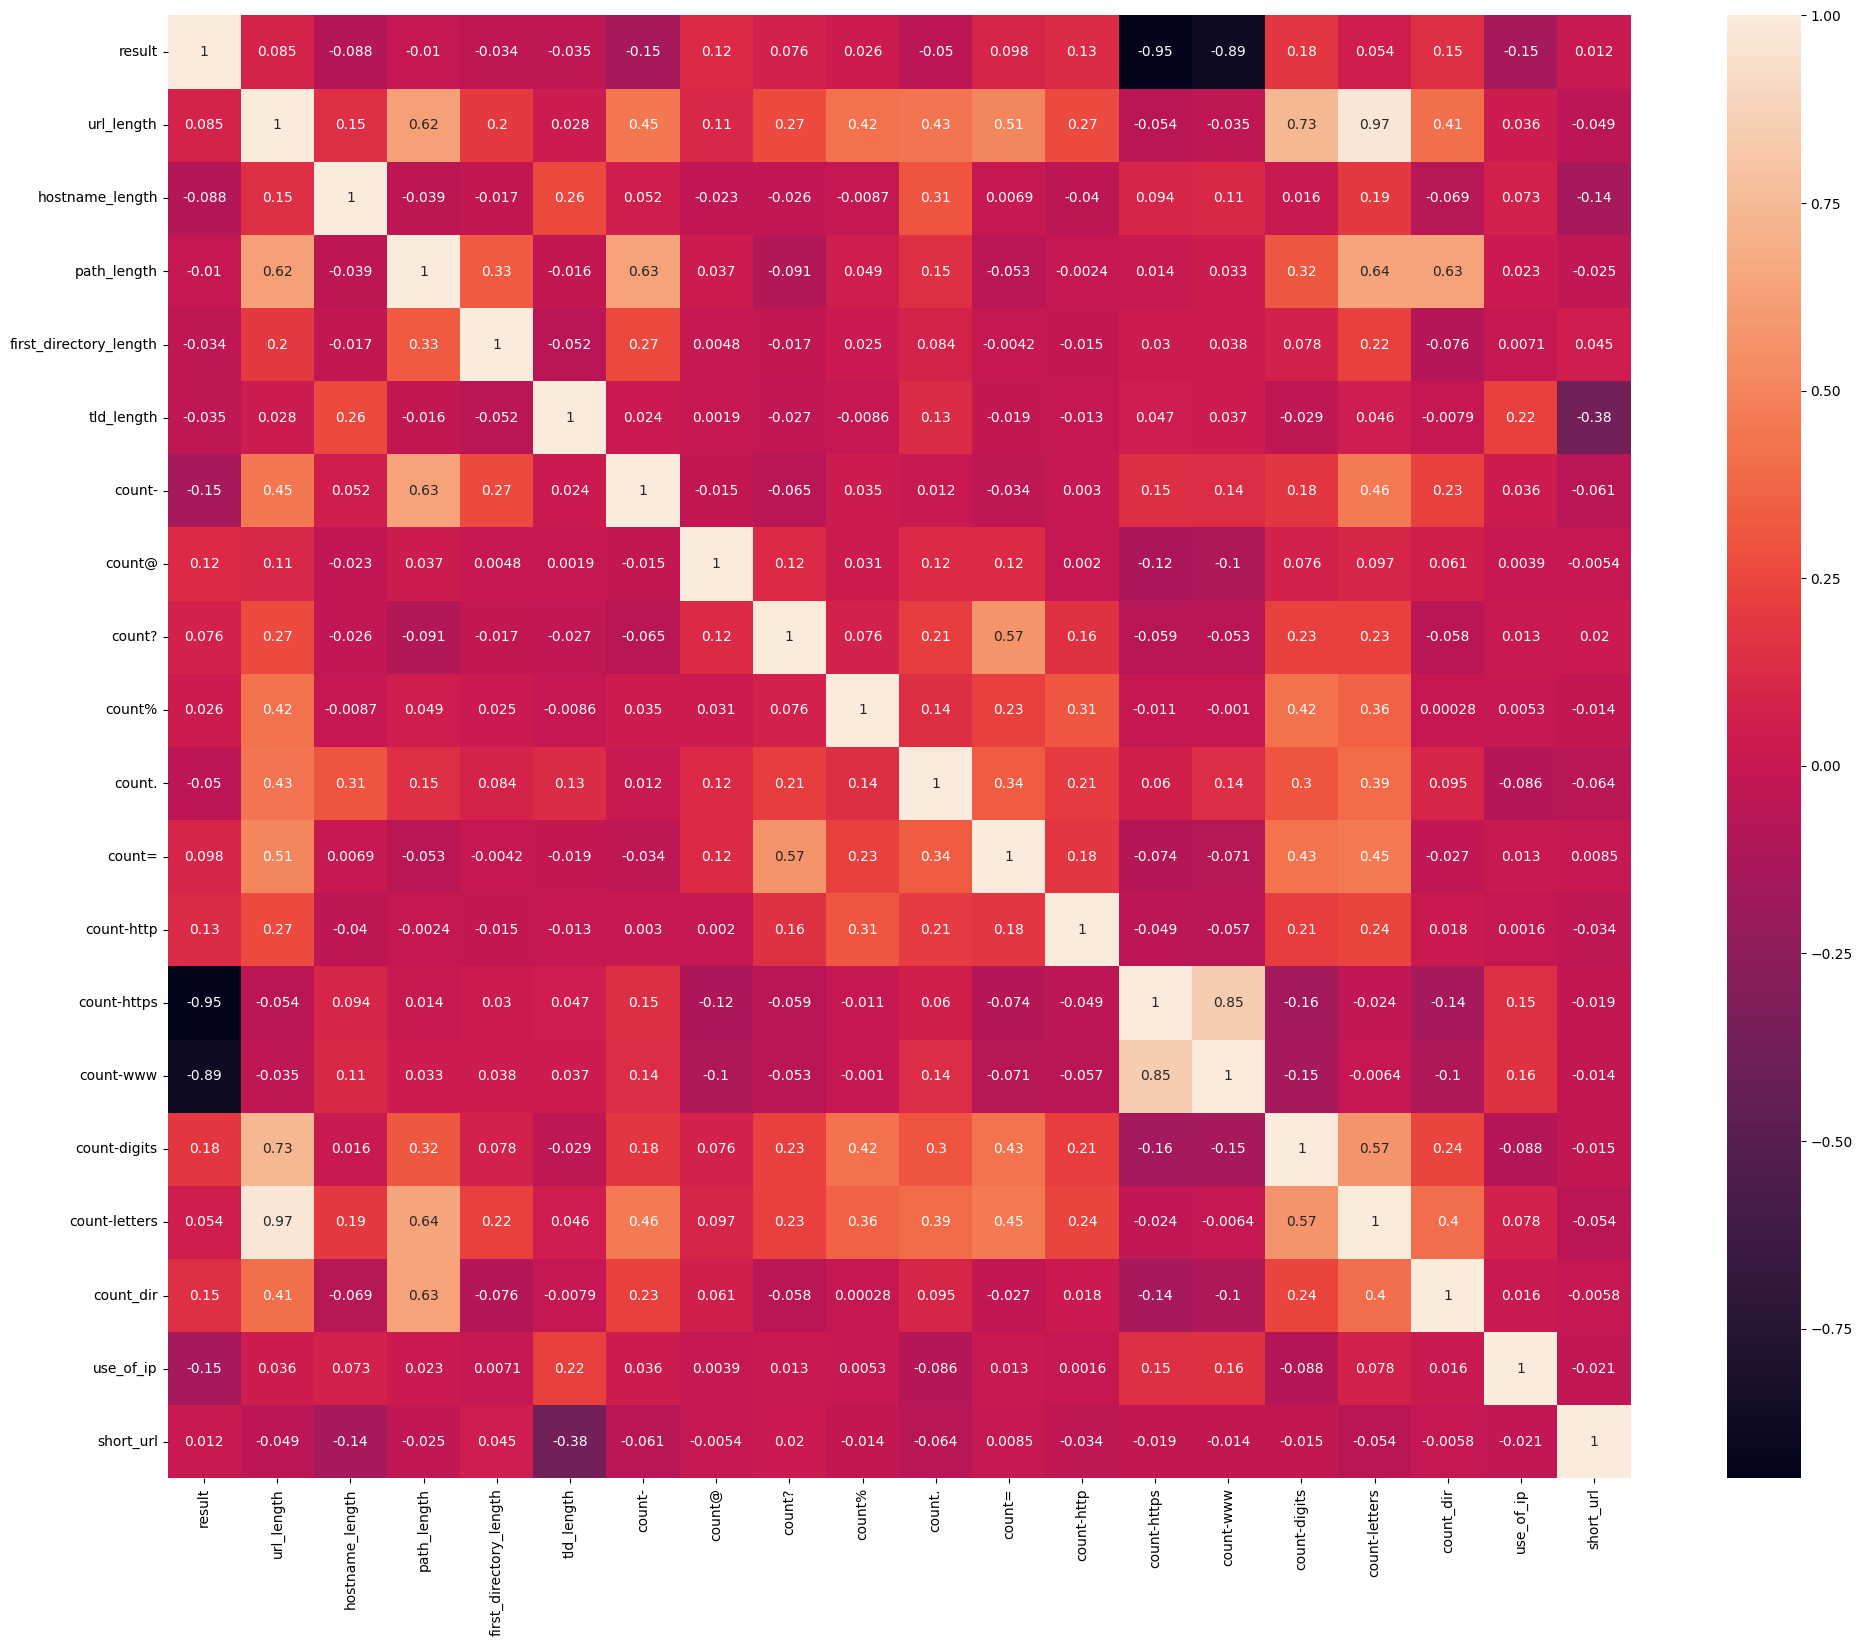

In [ ]:
#Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

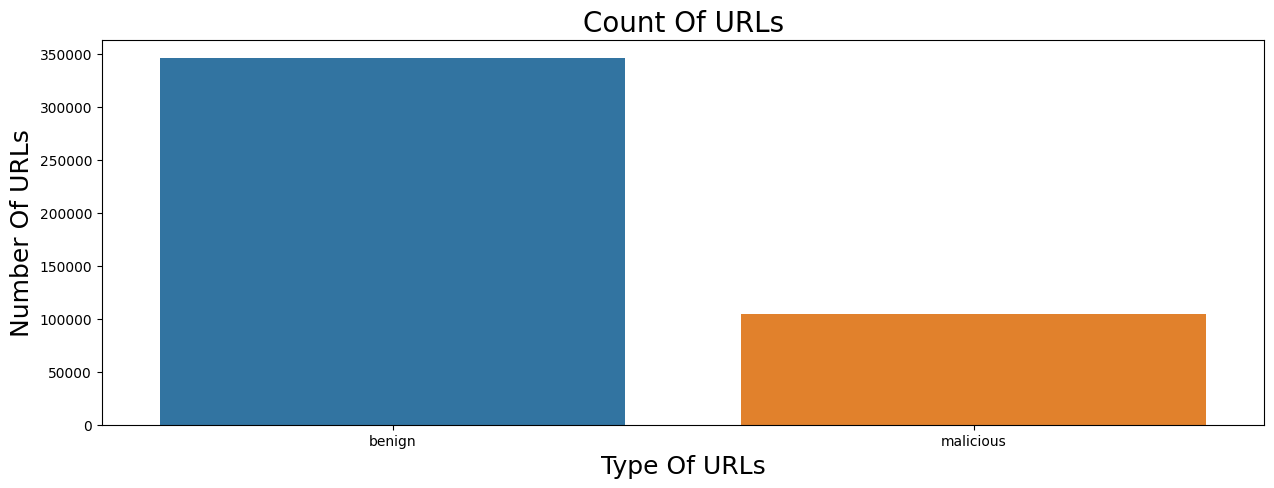

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [ ]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:23.20 %
Percent Of Benign URLs:76.80 %


##KEY OBSERVATION FROM GRAPH:


*  Most URLs are less than 1000 characters long. This is likely due to the fact that shorter URLs are easier to remember and type, and they are also less likely to be flagged as spam by email filters.


*  There is a significant number of URLs that are longer than 1000 characters. This may be due to the increasing complexity of websites and the need to include more information in URLs. For example, many modern websites rely on parameters in the URL to specify the content of the page.


* The **longest URLs** are typically associated with **phishing websites and other malicious websites**. This is because phishing websites often use long, complex URLs to trick users into clicking on them.

(0.0, 1000.0)

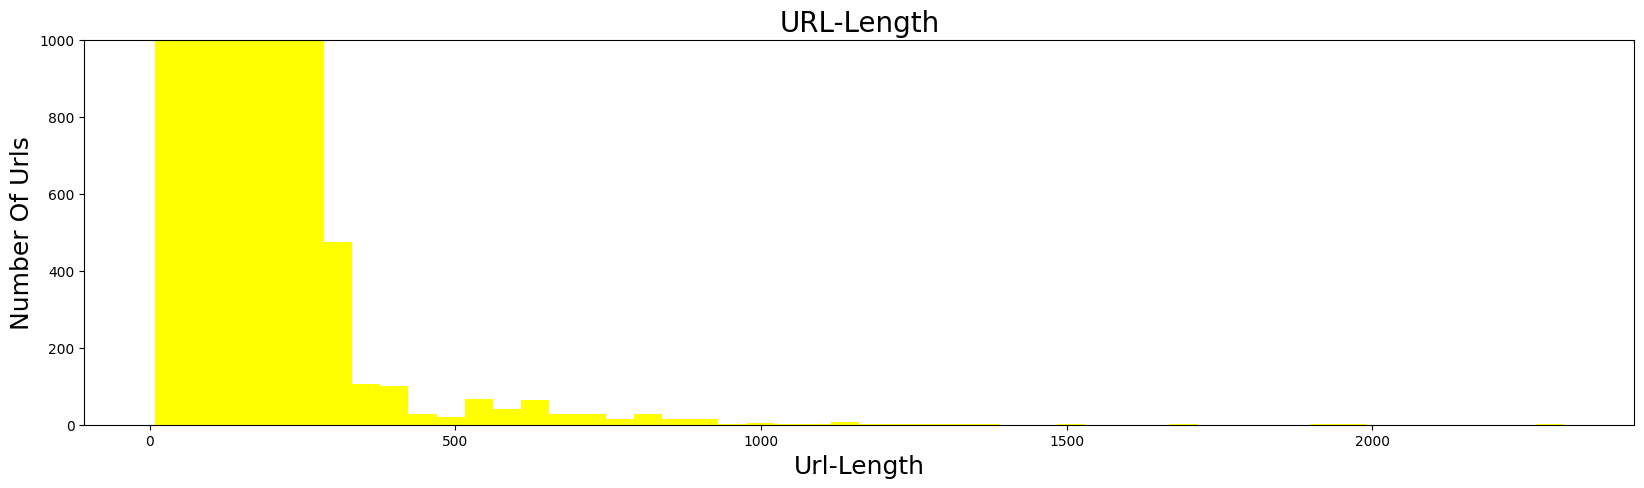

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='yellow')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)


##KEY OBSERVATION FROM GRAPH

**Larger websites tend to have more complex and hierarchical hostnames.**

For example, a large e-commerce website might have a hostname like

www.example.com/en/electronics/laptops/lenovo/thinkpad-t14.

This hostname is relatively long because it includes information about the website's language, product category, and brand.

**Longer hostnames can be used to create more specific subdomains.**

For example, a website might have a subdomain for each of its product categories, such as electronics.example.com and apparel.example.com.

This allows the website to create more targeted and relevant content for each product category.

**Phishing websites often use long, complex hostnames to try to trick users into thinking they are legitimate websites**.

For example, a phishing website might use a hostname like www.example.com.google.com.

This hostname looks similar to the legitimate hostname of the Google website, but it actually includes a malicious subdomain (example.com).

(0.0, 1000.0)

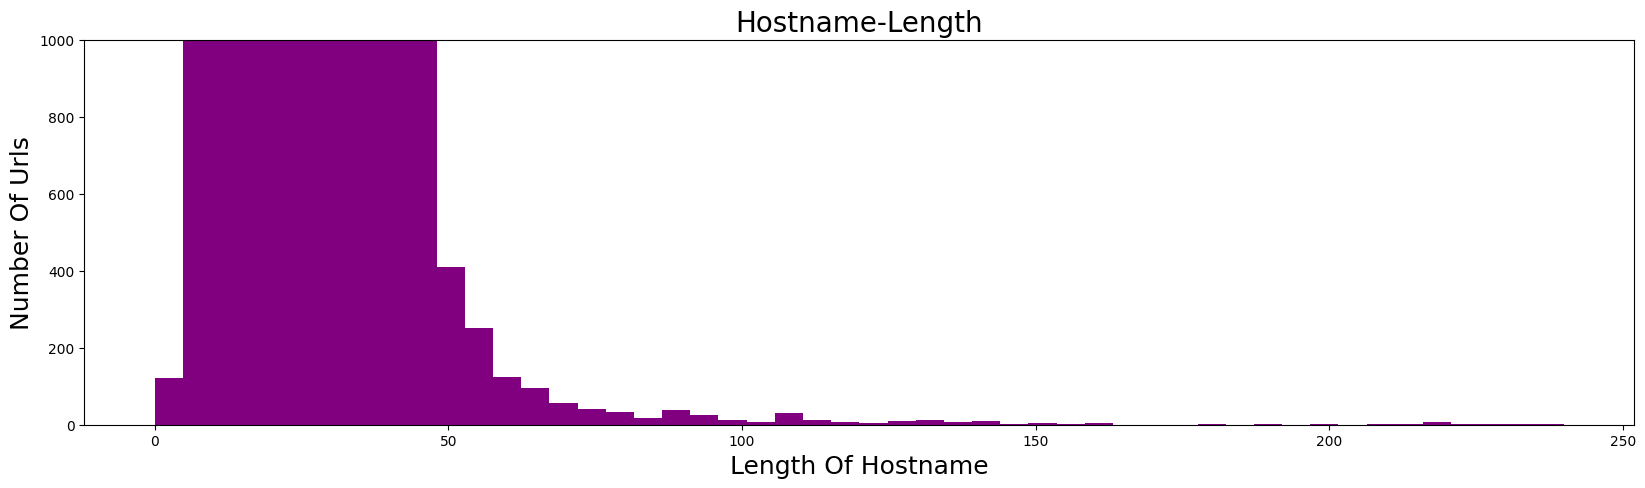

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='purple')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

##KEY OBSERVATION FROM GRAPH
1. **TLD Length vs. URL Registration:** Shorter TLDs, like .com, have more registrations, showcasing an inverse relationship between TLD length and URL count.

2. **Popular TLDs:** .com leads in registrations, followed by .net and .org, attributed to its widespread use across diverse sectors.

3. **Factors Driving Registration:** Shorter TLDs are favored due to ease of recall, typing, and higher value in the secondary domain market.

4. **Specialized TLDs:** TLDs like .edu and .gov have fewer registrations, serving specific sectors, while .museum and .aero are less commonly used.

5. **Increasing URL Registration Trend:** Across all TLDs, there is a consistent upward trend in URL registrations, reflecting the continuous growth of the internet.

(0.0, 1000.0)

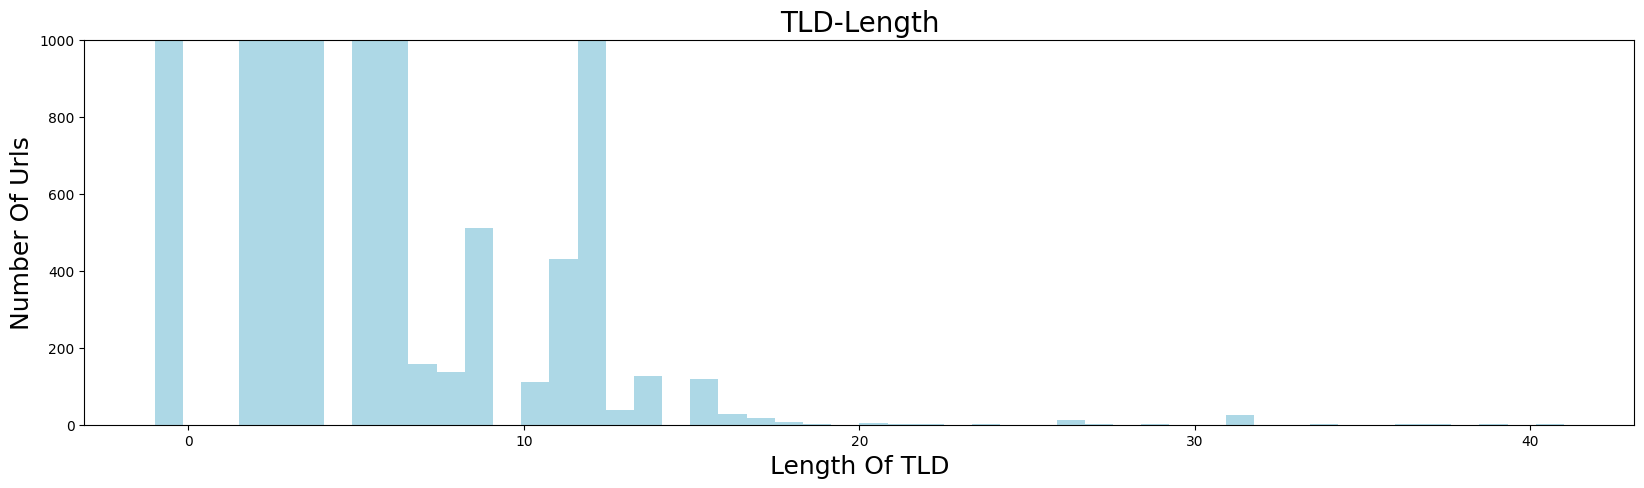

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(urldata['tld_length'],bins=50,color='Lightblue')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

##KEY OBSERVATION FROM GRAPH
1. **Distribution of Directories:** The graph reveals an inverse relationship between the number of directories in a URL and their frequency. URLs with fewer directories, especially those with 0 directories (root domains), are more prevalent compared to URLs with higher directory counts.

2. **Reasons for Distribution:** Shorter URLs, with fewer directories, are favored due to their ease of recall and typing, as well as their common use in advertising and marketing. Root domains, with 0 directories, are often associated with authoritative websites, contributing to their popularity.

3. **Increasing Trend Over Time:** The graph demonstrates a consistent increase in the number of URLs across various directory counts over time. This trend aligns with the rapid growth of the internet and the increasing creation of websites with more complex directory structures.

4. **Common Directory Counts:** The most common directory counts in URLs are 0, 1, 2, and 3. URLs with more than 5 directories are relatively rare.

5. **Overall Pattern:** URLs with fewer directories are more prevalent, emphasizing the preference for shorter URLs in the online landscape, driven by ease of use, marketing practices, and the popularity of authoritative root domains.

Text(0, 0.5, 'Number Of URLs')

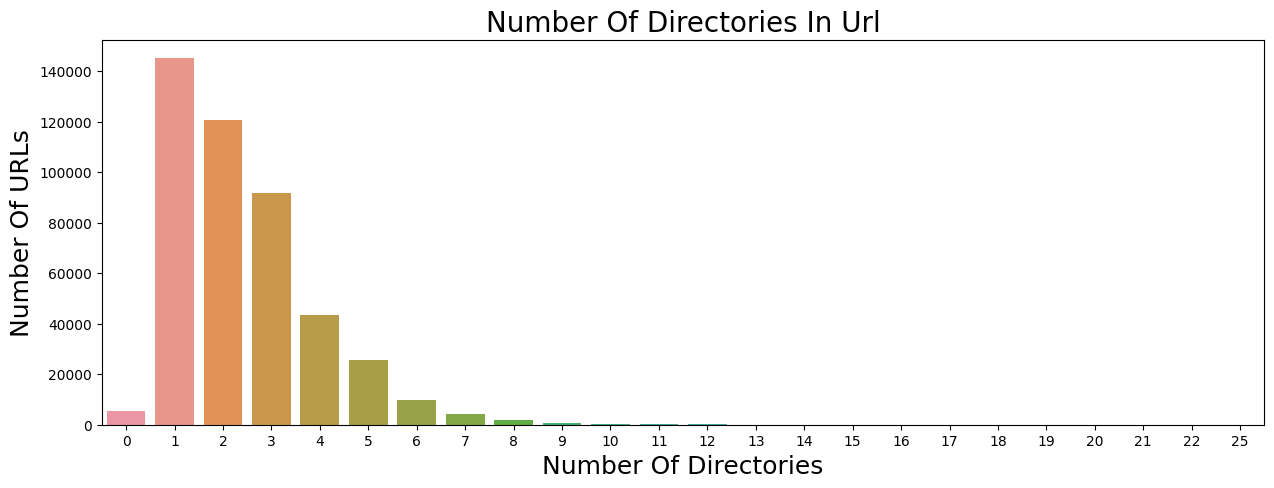

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

##KEY OBSERVATION OF GRAPH
1. **Malicious URLs and Directory Complexity:** The graph highlights a connection between malicious intent and the complexity of directory structures in URLs, with malicious actors using intricate paths to disguise their URLs.

2. **Rising Malicious Trends:** Over time, there is a consistent increase in the number of malicious URLs, indicating ongoing efforts by attackers to develop evasion techniques.

3. **10+ Directories as Risk Threshold:** URLs with 10 or more directories are notably more likely to be malicious, with a continuous rise in the number of such malicious URLs.

4. **Scarcity of Benign URLs with Complex Directories:** Few benign URLs exhibit complex directory structures, emphasizing that intricacy is often linked to malicious intent.

Text(0, 0.5, 'Number Of URLs')

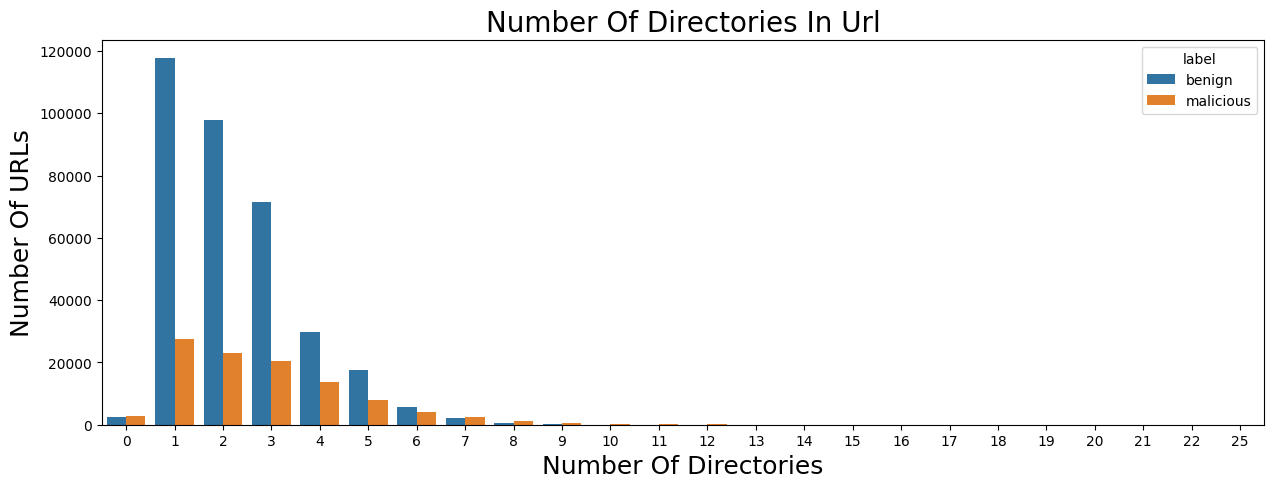

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

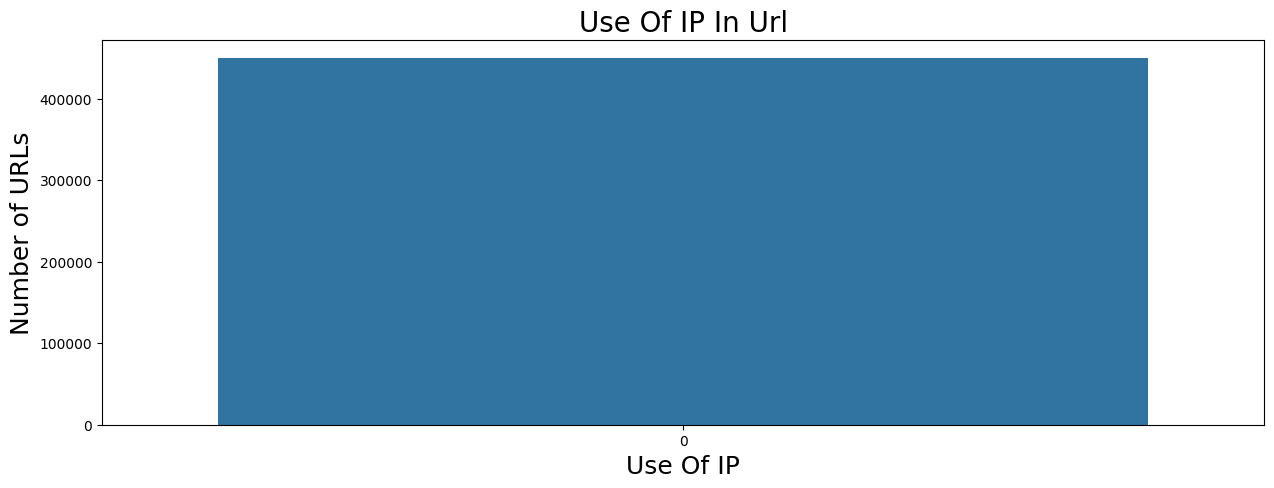

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)

sns.countplot(urldata['use_of_ip'])
plt.ylabel("Number of URLs",fontsize=18)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

In [ ]:
print(urldata.columns)

Index(['url', 'label', 'result', 'url_length', 'hostname_length',
       'path_length', 'first_directory_length', 'extracted_tld', 'tld_length',
       'count-', 'count@', 'count?', 'count%', 'count.', 'count=',
       'count-http', 'count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip', 'short_url'],
      dtype='object')


In [ ]:
#Predictor Variables
x = urldata[['hostname_length', 'path_length', 'first_directory_length', 'tld_length', 'count-', 'count@', 'count?', 'count%', 'count.', 'count=', 'count-http', 'count-https', 'count-www', 'count-digits', 'count-letters', 'count_dir', 'use_of_ip']]

#Target Variable
y = urldata['result']

In [ ]:
x.shape

(450176, 17)

In [ ]:
y.shape

(450176,)

In [ ]:
#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

dt_predictions = dt_model.predict(x_test)
accuracy = accuracy_score(y_test, dt_predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 99.54%


In [ ]:
print(confusion_matrix(y_test,dt_predictions))

[[241234    718]
 [   716  72456]]


In [ ]:
#Random Forest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_predictions = rfc.predict(x_test)
accuracy_score(y_test, rfc_predictions)

0.9972709155760907

In [ ]:
print(confusion_matrix(y_test,rfc_predictions))

[[241670    282]
 [   578  72594]]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings
# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a logistic regression model with an increased maximum iteration limit
log_model = LogisticRegression(max_iter=10000)

# Fit the model to the scaled training data
log_model.fit(x_train_scaled, y_train)

# Make predictions on the scaled test data
log_predictions = log_model.predict(x_test_scaled)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, log_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.65%


In [ ]:
print(confusion_matrix(y_test,log_predictions))

[[241412    540]
 [   633  72539]]


In [ ]:
print(new_data.columns)

Index(['hostname_length', 'path_length', 'first_directory_length',
       'tld_length', 'count-', 'count@', 'count?', 'count%', 'count.',
       'count=', 'count-http', 'count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip'],
      dtype='object')


In [ ]:
!pip install tld # to test whether its installed or not

1. **Data Splitting:** The code uses the `train_test_split` function from scikit-learn to split the data (`x` and `y`) into training and testing sets, with 30% of the data reserved for testing. The random seed is set to ensure reproducibility.

2. **Decision Tree Model Training:** A Decision Tree Classifier (`DecisionTreeClassifier`) is instantiated and trained on the training data (`x_train` and `y_train`). This model is used for classifying URLs into malicious or benign categories.

3. **Setting Feature Names:** The feature names in the trained Decision Tree model are set to correspond to the columns of the training data (`x_train.columns`).

4. **Feature Extraction Functions:** Two functions, `fd_length` and `extract_features`, are defined. `fd_length` calculates the length of the first directory in a URL, and `extract_features` extracts various features from a given URL, such as length, counts of specific characters, and the result of the `having_ip_address` function.

5. **Feature Extraction for Example URLs:** The `extract_features` function is applied to a list of example URLs (`urls_to_test`). The extracted features are then concatenated into a DataFrame (`new_data`).

6. **Ensuring Feature Names Match:** The feature names in `new_data` are aligned with the feature names in the training data (`x_train.columns`) to ensure consistency.

7. **Predictions and Display:** The trained Decision Tree model is used to predict whether the example URLs are malicious or benign (`dt_predictions_new`). The predictions are displayed for each URL, indicating whether the model classifies them as "malicious" or "benign." The result is printed for each URL in the `urls_to_test` list.

1. The code utilizes a predefined list, **`urls_to_test`**, containing sample URLs to assess the trained model's performance and ensure its correct classification of these unseen data points.



In [ ]:
import numpy as np
import pandas as pd
from urllib.parse import urlparse
from tld import get_tld
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming x and y are your training data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

# Train the model with the correct feature names
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# Set feature names in the trained model
dt_model.feature_names = x_train.columns

# Function to calculate fd_length
def fd_length(url):
    urlpath = urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

# Function to extract features for a given URL
def extract_features(url):
    url_length = len(str(url))
    hostname_length = len(urlparse(url).netloc)
    path_length = len(urlparse(url).path)
    fd_len = fd_length(url)
    tld_len = len(get_tld(url, fail_silently=True))

    new_data = pd.DataFrame({
        'url_length': [url_length],  # Add the missing feature
        'hostname_length': [hostname_length],
        'path_length': [path_length],
        'first_directory_length': [fd_len],  # Use the correct feature name
        'tld_length': [tld_len],
        'count-': [url.count('-')],
        'count@': [url.count('@')],
        'count?': [url.count('?')],
        'count%': [url.count('%')],
        'count.': [url.count('.')],
        'count=': [url.count('=')],
        'count-http': [url.count('http')],
        'count-https': [url.count('https')],
        'count-www': [url.count('www')],
        'count-digits': [sum(c.isdigit() for c in url)],
        'count-letters': [sum(c.isalpha() for c in url)],
        'count_dir': [urlparse(url).path.count('/')],
        'use_of_ip': [having_ip_address(url)],  # Assuming you have a function named having_ip_address
    })

    return new_data

# Example URLs to test
urls_to_test = ['https://www.instagram.com/', 'http://ecct-it.com/docmmmnn/aptgd/index.php', 'https://www.w3schools.com/bootstrap/bootstrap_ver.asp', 'https://www.google.com/search?q=pace+portal+login&rlz=1C1JJTC_enIN957IN957&oq=pace&gs_lcrp=EgZjaHJvbWUqDggAEEUYJxg7GIAEGIoFMg4IABBFGCcYOxiABBiKBTIPCAEQRRg5GIMBGLEDGIAEMg4IAhBFGCcYOxiABBiKBTIGCAMQRRg8MgYIBBBFGDwyBggFEEUYPDIGCAYQRRhBMgYIBxBFGEHSAQgxNDg4ajBqN6gCALACAA&sourceid=chrome&ie=UTF-8']

# Extract features for each URL
new_data = pd.concat([extract_features(url) for url in urls_to_test], ignore_index=True)

# Ensure that feature names match
new_data = new_data[x_train.columns]

# Use the trained model to predict labels for the new URLs
dt_predictions_new = dt_model.predict(new_data)

# Display the predictions for each URL
for url, prediction in zip(urls_to_test, dt_predictions_new):
    print(f"URL: {url}, Prediction: {'malicious' if prediction == 1 else 'benign'}")


URL: https://www.instagram.com/, Prediction: benign
URL: http://ecct-it.com/docmmmnn/aptgd/index.php, Prediction: malicious
URL: https://www.w3schools.com/bootstrap/bootstrap_ver.asp, Prediction: benign
URL: https://www.google.com/search?q=pace+portal+login&rlz=1C1JJTC_enIN957IN957&oq=pace&gs_lcrp=EgZjaHJvbWUqDggAEEUYJxg7GIAEGIoFMg4IABBFGCcYOxiABBiKBTIPCAEQRRg5GIMBGLEDGIAEMg4IAhBFGCcYOxiABBiKBTIGCAMQRRg8MgYIBBBFGDwyBggFEEUYPDIGCAYQRRhBMgYIBxBFGEHSAQgxNDg4ajBqN6gCALACAA&sourceid=chrome&ie=UTF-8, Prediction: benign
